In [138]:
cd downloads

[Errno 2] No such file or directory: 'downloads'
/Users/macbookpro/Downloads


# Input Packages

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
import pandas as pd
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Dataset 1

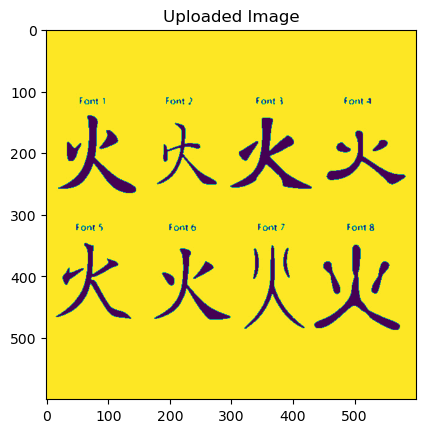

In [6]:

# Load and display the provided image
img_path = "exampledata7.jpg"
img = Image.open(img_path)

# Display the image
plt.imshow(img)
plt.axis('on')  # Display axes for clarity
plt.title("Uploaded Image")
plt.show()


# Bounding box of data

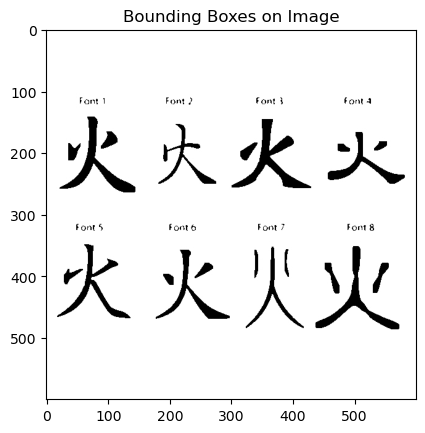

[(188, 395, 20, 21),
 (27, 387, 34, 28),
 (528, 377, 29, 52),
 (450, 377, 27, 53),
 (239, 377, 33, 28),
 (336, 356, 9, 49),
 (176, 356, 123, 115),
 (385, 355, 10, 48),
 (322, 351, 97, 135),
 (435, 350, 139, 138),
 (16, 347, 122, 123),
 (471, 184, 23, 16),
 (34, 183, 23, 31),
 (313, 182, 31, 32),
 (530, 180, 24, 18),
 (455, 165, 128, 87),
 (87, 164, 30, 31),
 (180, 152, 97, 100),
 (299, 144, 132, 115),
 (20, 140, 126, 126)]

In [7]:


# Since the image is already in grayscale, we can proceed with thresholding
_, thresh = cv2.threshold(np.array(img), 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Find contours in the thresholded image
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter out small contours based on area to avoid noise
filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > 100]

# Extract bounding boxes from the contours
bboxes = [cv2.boundingRect(cnt) for cnt in filtered_contours]

# Draw the bounding boxes on the original image
img_with_bboxes = np.array(img).copy()
for x, y, w, h in bboxes:
    cv2.rectangle(img_with_bboxes, (x, y), (x + w, y + h), (255, 0, 0), 2)

# Display the image with bounding boxes
plt.imshow(img_with_bboxes, cmap='gray')
plt.axis('on')
plt.title("Bounding Boxes on Image")
plt.show()

bboxes

# Ectracted image from data

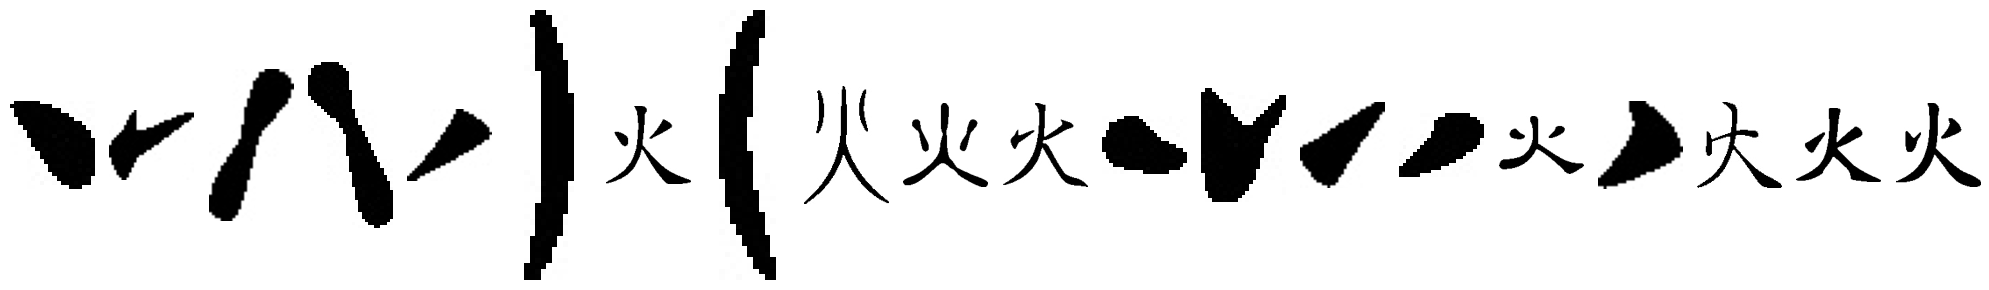

In [27]:
# Extract individual character images based on the bounding boxes
cropped_images = []
for x, y, w, h in bboxes:
    cropped = img.crop((x, y, x + w, y + h))
    cropped_images.append(cropped)

# Display the cropped images
fig, axes = plt.subplots(1, len(cropped_images), figsize=(20, 3))
for ax, cropped_img in zip(axes, cropped_images):
    ax.imshow(cropped_img, cmap='gray')
    ax.axis('off')

plt.tight_layout()
plt.show()

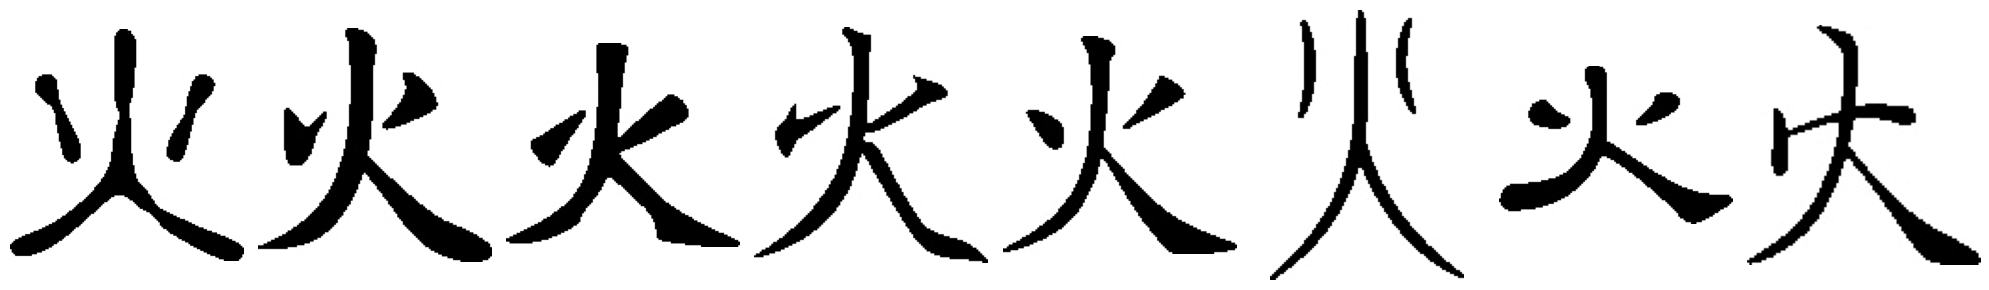

In [13]:
# Sort bounding boxes based on area
sorted_bboxes = sorted(bboxes, key=lambda bbox: bbox[2] * bbox[3], reverse=True)

# Set a threshold for the number of Kanji you expect to extract
num_kanji = 8

# Extract the bounding boxes with the largest areas up to the threshold
largest_bboxes = sorted_bboxes[:num_kanji]

cropped_images = []
for x, y, w, h in largest_bboxes:
    cropped = img.crop((x, y, x + w, y + h))
    cropped_images.append(cropped)

# Display the cropped images
fig, axes = plt.subplots(1, len(cropped_images), figsize=(20, 3))
for ax, cropped_img in zip(axes, cropped_images):
    ax.imshow(cropped_img, cmap='gray')
    ax.axis('off')

plt.tight_layout()
plt.show()


In [14]:
# Sort bounding boxes based on area
sorted_bboxes = sorted(bboxes, key=lambda bbox: bbox[2] * bbox[3], reverse=True)

# Set a threshold for the number of Kanji you expect to extract
num_kanji = 8

# Extract the bounding boxes with the largest areas up to the threshold
largest_bboxes = sorted_bboxes[:num_kanji]

cropped_images = []
for x, y, w, h in largest_bboxes:
    cropped = img.crop((x, y, x + w, y + h))
    cropped_images.append(cropped)

In [15]:


# Directory to save the cropped images
save_dir = "/Users/macbookpro/Downloads"
os.makedirs(save_dir, exist_ok=True)

# Save each cropped image to the directory
saved_paths = []
for idx, cropped_img in enumerate(cropped_images, start=1):
    save_path = os.path.join(save_dir, f"character_{idx}.jpg")
    cropped_img.save(save_path)
    saved_paths.append(save_path)

saved_paths


['/Users/macbookpro/Downloads/character_1.jpg',
 '/Users/macbookpro/Downloads/character_2.jpg',
 '/Users/macbookpro/Downloads/character_3.jpg',
 '/Users/macbookpro/Downloads/character_4.jpg',
 '/Users/macbookpro/Downloads/character_5.jpg',
 '/Users/macbookpro/Downloads/character_6.jpg',
 '/Users/macbookpro/Downloads/character_7.jpg',
 '/Users/macbookpro/Downloads/character_8.jpg']

In [10]:
# Extract individual character images based on the bounding boxes
#cropped_images = []
#for x, y, w, h in bboxes:
#    cropped = img.crop((x, y, x + w, y + h))
#    cropped_images.append(cropped)


In [11]:
#import os

# Directory to save the cropped images
#save_dir = "/Users/macbookpro/Downloads"
#os.makedirs(save_dir, exist_ok=True)

# Save each cropped image to the directory
#saved_paths = []
#for idx, cropped_img in enumerate(cropped_images, start=1):
#    save_path = os.path.join(save_dir, f"character_{idx}.jpg")
#    cropped_img.save(save_path)
#    saved_paths.append(save_path)

#saved_paths


['/Users/macbookpro/Downloads/character_1.jpg',
 '/Users/macbookpro/Downloads/character_2.jpg',
 '/Users/macbookpro/Downloads/character_3.jpg',
 '/Users/macbookpro/Downloads/character_4.jpg',
 '/Users/macbookpro/Downloads/character_5.jpg',
 '/Users/macbookpro/Downloads/character_6.jpg',
 '/Users/macbookpro/Downloads/character_7.jpg',
 '/Users/macbookpro/Downloads/character_8.jpg',
 '/Users/macbookpro/Downloads/character_9.jpg',
 '/Users/macbookpro/Downloads/character_10.jpg',
 '/Users/macbookpro/Downloads/character_11.jpg',
 '/Users/macbookpro/Downloads/character_12.jpg',
 '/Users/macbookpro/Downloads/character_13.jpg',
 '/Users/macbookpro/Downloads/character_14.jpg',
 '/Users/macbookpro/Downloads/character_15.jpg',
 '/Users/macbookpro/Downloads/character_16.jpg',
 '/Users/macbookpro/Downloads/character_17.jpg',
 '/Users/macbookpro/Downloads/character_18.jpg',
 '/Users/macbookpro/Downloads/character_19.jpg',
 '/Users/macbookpro/Downloads/character_20.jpg']

In [21]:


# Create a DataFrame
data = {
    'Character Name': [os.path.basename(path) for path in saved_paths],  # Extract the filename from the path
    'Label': ['火'] * len(saved_paths),  # The label for all is 火
    'English Translation': ['fire'] * len(saved_paths)  # The translation for all is fire
}

df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
csv_path = os.path.join(save_dir, "newlabels.csv")
df.to_csv(csv_path, index=False)


# Importing CSV file for the labelling

In [22]:
import pandas as pd

# Load the labels from the CSV file
labels_df = pd.read_csv('newlabels.csv')
labels_df

,Character Name,Label,English Translation
0,character_1.jpg,火,fire
1,character_2.jpg,火,fire
2,character_3.jpg,火,fire
3,character_4.jpg,火,fire
4,character_5.jpg,火,fire
5,character_6.jpg,火,fire
6,character_7.jpg,火,fire
7,character_8.jpg,火,fire


In [23]:
labels_df.describe()

,Character Name,Label,English Translation
count,8,8,8
unique,8,1,1
top,character_1.jpg,火,fire
freq,1,8,8


# CNN MODEL

In [24]:

# Load the labels from the CSV file
labels_df = pd.read_csv('newlabels.csv')

# Split the data into training and validation sets
train_df, val_df = train_test_split(labels_df, test_size=0.2, random_state=220074391)

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Data Generators
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory='/Users/macbookpro/Downloads/',
    x_col="Character Name",  # Changed column name to "Character Name"
    y_col="Label",           # Changed column name to "Label"
    target_size=(32, 32),
    class_mode="categorical",
    batch_size=5
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory='/Users/macbookpro/Downloads/',
    x_col="Character Name",  # Changed column name to "Character Name"
    y_col="Label",           # Changed column name to "Label"
    target_size=(32, 32),
    class_mode="categorical",
    batch_size=5
)

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_generator.class_indices)))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
model.fit(train_generator,
          epochs=50,
          validation_data=val_generator)

# Save the model
model.save('kanji_recognition_model.h5')


Found 6 validated image filenames belonging to 1 classes.
Found 2 validated image filenames belonging to 1 classes.
Epoch 1/50


/Users/macbookpro/anaconda3/lib/python3.11/site-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


2/2 [==============================] - 0s 122ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/50
2/2 [==============================] - 0s 19ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/50
2/2 [==============================] - 0s 17ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/50
2/2 [==============================] - 0s 17ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/50
2/2 [==============================] - 0s 20ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/50
2/2 [==============================] - 0s 21ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/50
2/2 [==============================] - 0s 21ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - va

/Users/macbookpro/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [25]:
loss, accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

1/1 [==============================] - 0s 23ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Validation Accuracy: 100.00%


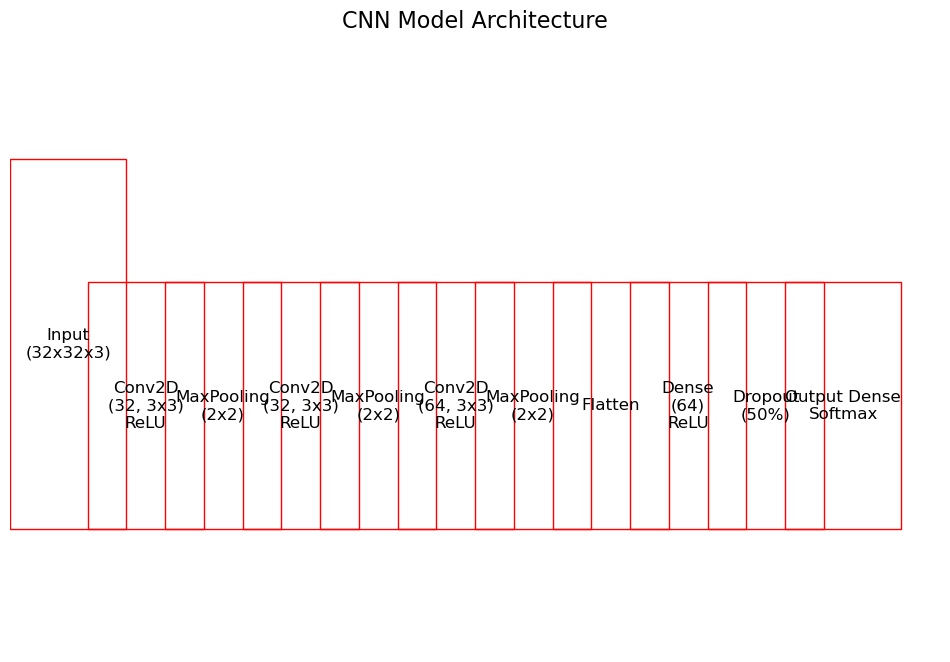

In [26]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def visualize_cnn_layers():
    # Define the figure
    fig, ax = plt.subplots(figsize=(12, 8))

    # Layer names and their descriptions
    layers = [
        "Input\n(32x32x3)",
        "Conv2D\n(32, 3x3)\nReLU",
        "MaxPooling\n(2x2)",
        "Conv2D\n(32, 3x3)\nReLU",
        "MaxPooling\n(2x2)",
        "Conv2D\n(64, 3x3)\nReLU",
        "MaxPooling\n(2x2)",
        "Flatten",
        "Dense\n(64)\nReLU",
        "Dropout\n(50%)",
        "Output Dense\nSoftmax"
    ]

    # Define the positions and sizes for each layer's rectangle
    positions = [(i, 0.5) for i in range(len(layers))]
    sizes = [(1.5, 1) for _ in range(len(layers))]
    sizes[0] = (1.5, 1.5)  # Input layer is slightly bigger

    # Create the rectangles and texts
    for (x, y), (width, height), layer in zip(positions, sizes, layers):
        rect = patches.Rectangle((x, y), width, height, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        ax.text(x + width/2, y + height/2, layer, ha='center', va='center', fontsize=12)

    # Adjust the plot
    ax.set_xlim(0, len(layers) + 1)
    ax.set_ylim(0, 2.5)
    ax.axis("off")
    plt.title("CNN Model Architecture", fontsize=16)

    plt.show()

# Call the function to visualize the layers
visualize_cnn_layers()


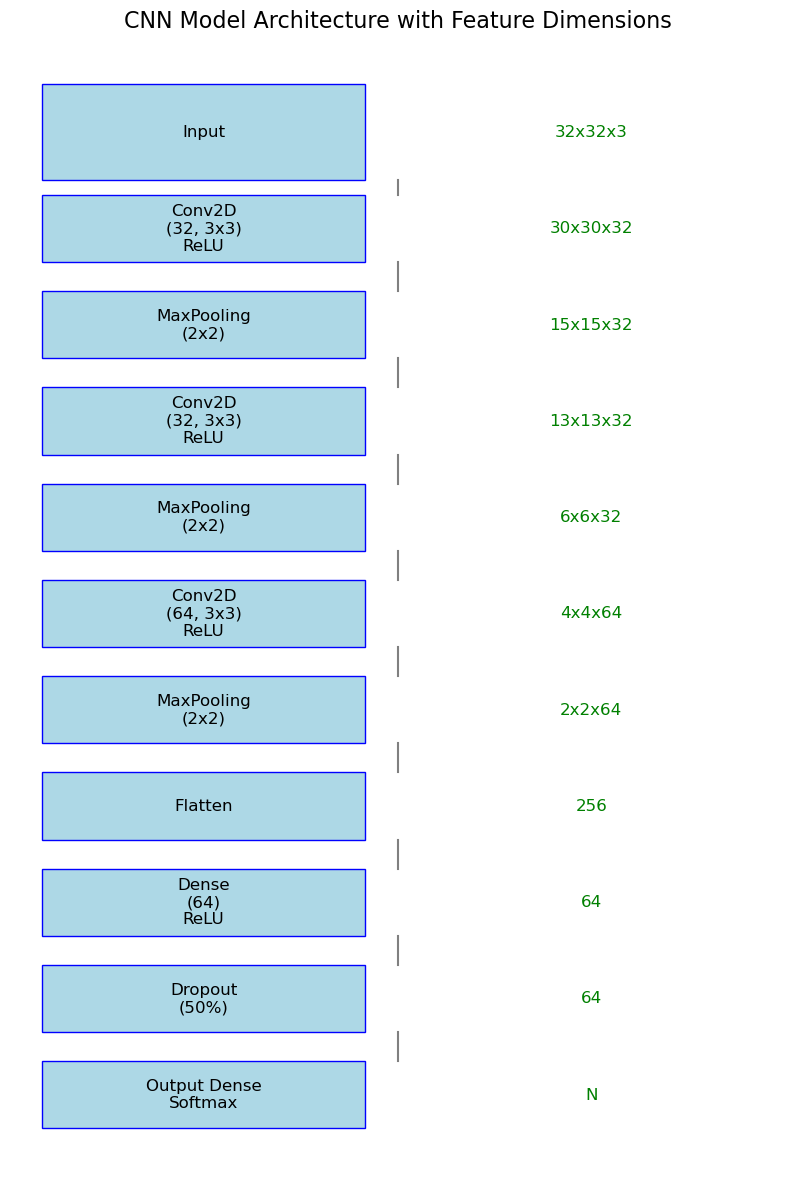

In [27]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def visualize_cnn_features():
    # Define the figure
    fig, ax = plt.subplots(figsize=(10, 15))

    # Layer names and feature matrix dimensions
    layers = [
        "Input",
        "Conv2D\n(32, 3x3)\nReLU",
        "MaxPooling\n(2x2)",
        "Conv2D\n(32, 3x3)\nReLU",
        "MaxPooling\n(2x2)",
        "Conv2D\n(64, 3x3)\nReLU",
        "MaxPooling\n(2x2)",
        "Flatten",
        "Dense\n(64)\nReLU",
        "Dropout\n(50%)",
        "Output Dense\nSoftmax"
    ]
    feature_dims = [
        "32x32x3",
        "30x30x32",
        "15x15x32",
        "13x13x32",
        "6x6x32",
        "4x4x64",
        "2x2x64",
        "256",
        "64",
        "64",
        "N"
    ]

    # Define positions and sizes for each layer's rectangle
    layer_positions = [(1.5, i) for i in range(len(layers), 0, -1)]
    feature_positions = [(4.5, i) for i in range(len(layers), 0, -1)]
    sizes = [(2.5, 0.7) for _ in layers]
    sizes[0] = (2.5, 1)  # Input layer is slightly bigger

    # Draw rectangles and text for layers and feature dimensions
    for (lx, ly), (fx, fy), (width, height), layer, feature_dim in zip(layer_positions, feature_positions, sizes, layers, feature_dims):
        rect = patches.Rectangle((lx - width/2, ly - height/2), width, height, linewidth=1, edgecolor='b', facecolor='lightblue')
        ax.add_patch(rect)
        ax.text(lx, ly, layer, ha='center', va='center', fontsize=12)
        ax.text(fx, fy, feature_dim, ha='center', va='center', fontsize=12, color='green')

    # Add connection lines between layers
    for i in range(len(layers) - 1):
        plt.plot([3, 3], [layer_positions[i][1] - sizes[i][1]/2, layer_positions[i+1][1] + sizes[i+1][1]/2], color='gray')

    # Adjust the plot
    ax.set_xlim(0, 6)
    ax.set_ylim(0, len(layers) + 1)
    ax.axis("off")
    plt.title("CNN Model Architecture with Feature Dimensions", fontsize=16)

    plt.show()

# Now you can call this function
visualize_cnn_features()

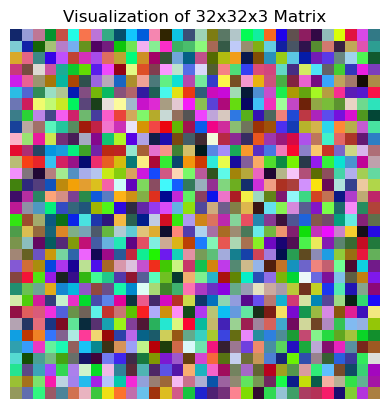

In [548]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a random 32x32x3 matrix (values between 0 and 1)
matrix = np.random.rand(32, 32, 3)

# Visualize the matrix as an image
plt.imshow(matrix)
plt.axis('off')  # To hide the axis
plt.title("Visualization of 32x32x3 Matrix")
plt.show()


In [30]:
import tensorflow as tf

# Testing Data

In [31]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def predict_image(image_path, model, train_generator):
    # Load and preprocess the image
    image = load_img(image_path, target_size=(32, 32), color_mode="grayscale")
    image_array = img_to_array(image)
    image_array = np.repeat(image_array, 3, axis=-1)  # Replicate the grayscale channel 3 times to make it RGB-like
    image_array = image_array / 255.0  # Normalize
    image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension
    
    # Predict using the model
    predictions = model.predict(image_array)
    predicted_class = np.argmax(predictions[0])

    # Get the class indices from the training generator
    label_map = train_generator.class_indices
    predicted_label = list(label_map.keys())[list(label_map.values()).index(predicted_class)]

    return predicted_label

# Load the trained model (assuming you have already trained and saved it)
model = tf.keras.models.load_model('kanji_recognition_model.h5')

# Predict for the uploaded images
resized_image_path = '/Users/macbookpro/Downloads/resized_image.jpg'
closing_image_path = '/Users/macbookpro/Downloads/closing_image.jpg'

predicted_label_resized = predict_image(resized_image_path, model, train_generator)
predicted_label_closing = predict_image(closing_image_path, model, train_generator)

print(f"Prediction for resized_image: {predicted_label_resized}")
print(f"Prediction for closing_image: {predicted_label_closing}")


1/1 [==============================] - 0s 9ms/step
Prediction for resized_image: 火
Prediction for closing_image: 火


In [32]:
# True labels for the test images (assuming both are "火")
true_labels = ["火", "火"]

# Model predictions for the test images
predicted_labels = [predicted_label_resized, predicted_label_closing]

# Compute accuracy
correct_predictions = sum([true == pred for true, pred in zip(true_labels, predicted_labels)])
accuracy = correct_predictions / len(true_labels) * 100

print(f"Accuracy: {accuracy:.2f}%")


Accuracy: 100.00%


# Improving the Model by adding more Data

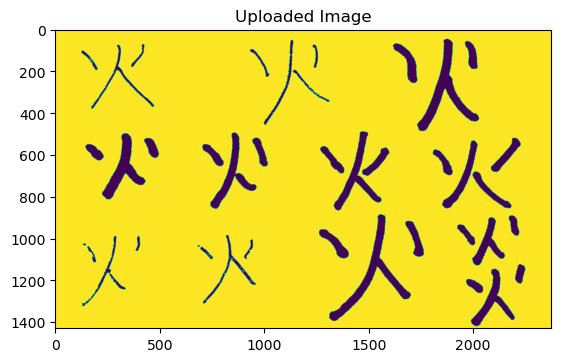

In [33]:
from PIL import Image
import matplotlib.pyplot as plt

# Load and display the provided image
img_path = "exampledata10.jpg"
img = Image.open(img_path)

# Display the image
plt.imshow(img)
plt.axis('on')  # Display axes for clarity
plt.title("Uploaded Image")
plt.show()


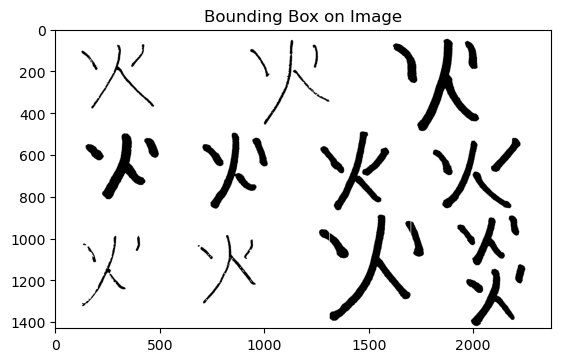

(1313, 886, 390, 510)

In [37]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Assuming 'img' is already defined and loaded
# Since the image is already in grayscale, we can proceed with thresholding
_, thresh = cv2.threshold(np.array(img), 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Find contours in the thresholded image
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Extract bounding boxes from the contours
bboxes = [cv2.boundingRect(cnt) for cnt in contours]

# Find the bounding box with the largest area (assuming it's the full Kanji character)
largest_bbox = max(bboxes, key=lambda bbox: bbox[2] * bbox[3])

# Draw the largest bounding box on the original image
img_with_bbox = np.array(img).copy()
x, y, w, h = largest_bbox
cv2.rectangle(img_with_bbox, (x, y), (x + w, y + h), (255, 0, 0), 2)

# Display the image with bounding box
plt.imshow(img_with_bbox, cmap='gray')
plt.axis('on')
plt.title("Bounding Box on Image")
plt.show()

largest_bbox


# visualizing the bounding box

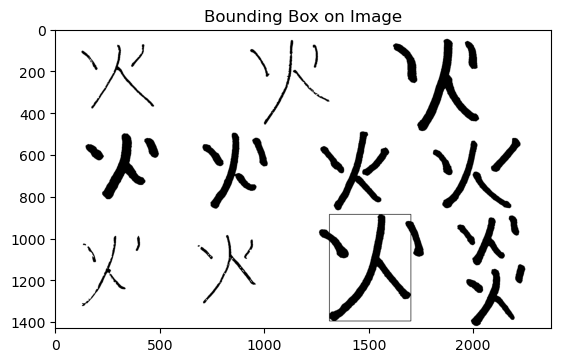

(1313, 886, 390, 510)


In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def visualize_bounding_boxes(image_path):
    # Load the image using PIL
    img = Image.open(image_path)
    
    # Convert the image to binary using Otsu's thresholding
    _, thresh = cv2.threshold(np.array(img), 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Find contours in the thresholded image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Extract bounding boxes from the contours
    bboxes = [cv2.boundingRect(cnt) for cnt in contours]

    # Find the bounding box with the largest area (assuming it's the full Kanji character)
    largest_bbox = max(bboxes, key=lambda bbox: bbox[2] * bbox[3])

    # Draw the largest bounding box on the original image
    img_with_bbox = np.array(img).copy()
    x, y, w, h = largest_bbox
    cv2.rectangle(img_with_bbox, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Display the image with bounding box
    plt.imshow(img_with_bbox, cmap='gray')
    plt.axis('on')
    plt.title("Bounding Box on Image")
    plt.show()
    
    return largest_bbox

# Usage example:
image_path = 'exampledata10.jpg'
bounding_box = visualize_bounding_boxes(image_path)
print(bounding_box)


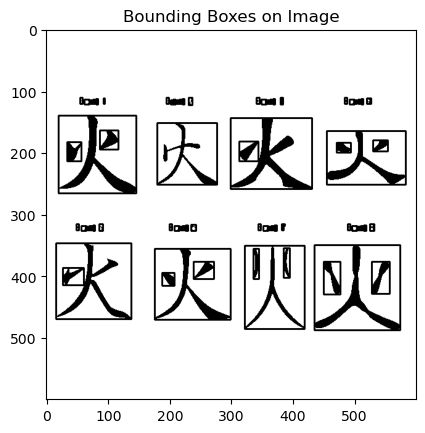

[(188, 395, 20, 21), (27, 387, 34, 28), (528, 377, 29, 52), (450, 377, 27, 53), (239, 377, 33, 28), (336, 356, 9, 49), (176, 356, 123, 115), (385, 355, 10, 48), (322, 351, 97, 135), (435, 350, 139, 138), (16, 347, 122, 123), (506, 320, 3, 6), (382, 320, 3, 6), (361, 320, 3, 6), (217, 320, 3, 6), (67, 320, 2, 6), (510, 319, 3, 7), (496, 319, 8, 8), (365, 319, 4, 7), (352, 319, 8, 8), (221, 319, 4, 7), (208, 319, 8, 8), (70, 319, 4, 7), (57, 319, 8, 8), (515, 318, 4, 9), (370, 318, 4, 9), (226, 318, 4, 9), (76, 318, 3, 9), (235, 317, 8, 10), (525, 316, 7, 11), (489, 316, 4, 10), (382, 316, 5, 3), (344, 316, 4, 10), (200, 316, 4, 10), (86, 316, 6, 11), (49, 316, 4, 10), (471, 184, 23, 16), (34, 183, 23, 31), (313, 182, 31, 32), (530, 180, 24, 18), (455, 165, 128, 87), (87, 164, 30, 31), (180, 152, 97, 100), (299, 144, 132, 115), (20, 140, 126, 126), (502, 115, 2, 6), (359, 115, 3, 6), (212, 115, 3, 6), (202, 115, 3, 7), (72, 115, 3, 6), (506, 114, 3, 7), (492, 114, 8, 8), (363, 114, 3, 7)

In [525]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def visualize_bounding_boxes(image_path):
    # Load the image using PIL
    img = Image.open(image_path)
    
    # Convert the image to binary using Otsu's thresholding
    _, thresh = cv2.threshold(np.array(img), 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Find contours in the thresholded image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Extract bounding boxes from the contours
    bboxes = [cv2.boundingRect(cnt) for cnt in contours]

    # Draw all the bounding boxes on the original image
    img_with_bbox = np.array(img).copy()
    for bbox in bboxes:
        x, y, w, h = bbox
        cv2.rectangle(img_with_bbox, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Display the image with bounding boxes
    plt.imshow(img_with_bbox, cmap='gray')
    plt.axis('on')
    plt.title("Bounding Boxes on Image")
    plt.show()
    
    return bboxes

# Usage example:
image_path = 'exampledata7.jpg'
bounding_boxes = visualize_bounding_boxes(image_path)
print(bounding_boxes)


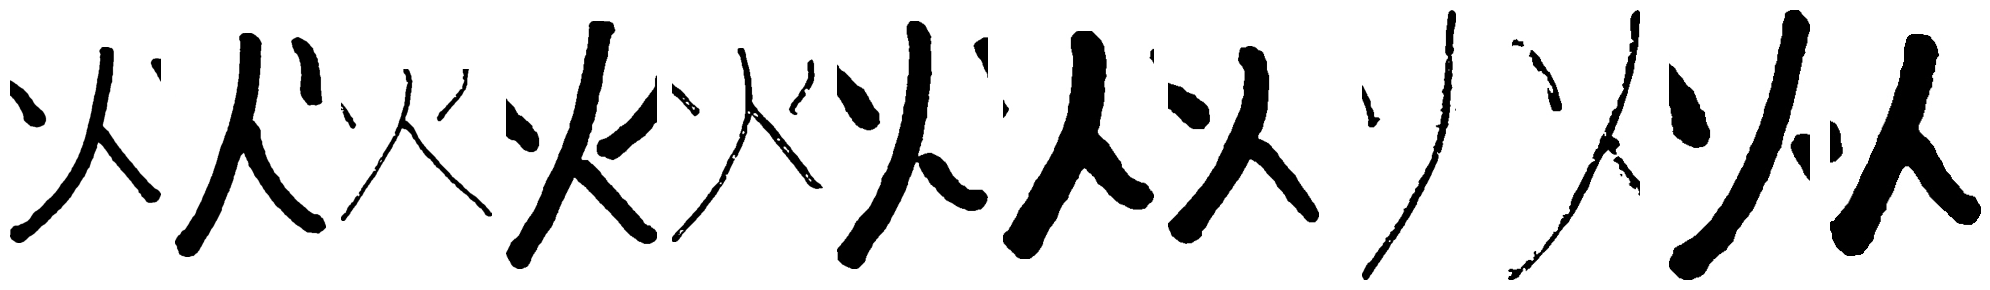

In [41]:
# Sort the bounding boxes based on their area (from largest to smallest)
sorted_bboxes = sorted(bboxes, key=lambda bbox: bbox[2] * bbox[3], reverse=True)

# Extract the top 'n' bounding boxes
num_kanji = 12  # Adjust this based on the number of Kanji characters you expect
selected_bboxes = sorted_bboxes[:num_kanji]

# Extract individual Kanji character images based on the selected bounding boxes
cropped_images = [img.crop((x, y, x + w, y + h)) for x, y, w, h in selected_bboxes]

# Display the extracted Kanji characters
fig, axes = plt.subplots(1, len(cropped_images), figsize=(20, 3))
for ax, cropped_img in zip(axes, cropped_images):
    ax.imshow(cropped_img, cmap='gray')
    ax.axis('off')

plt.tight_layout()
plt.show()


In [53]:
import pandas as pd

# Sort the bounding boxes based on their area (from largest to smallest)
sorted_bboxes = sorted(bboxes, key=lambda bbox: bbox[2] * bbox[3], reverse=True)

# Number of Kanji characters you expect to extract
num_kanji = 12

# Extract the top 'n' Kanji character images based on the selected bounding boxes
selected_bboxes = sorted_bboxes[:num_kanji]
cropped_images = [img.crop((x, y, x + w, y + h)) for x, y, w, h in selected_bboxes]

# Directory to save the cropped images
save_directory = "/Users/macbookpro/Downloads"
os.makedirs(save_directory, exist_ok=True)

# Check the existing files in the directory to ensure unique filenames
existing_files = os.listdir(save_directory)
existing_counts = [int(f.split('_')[1].split('.')[0]) for f in existing_files if "character_" in f]
start_idx = max(existing_counts, default=-1) + 1

# List to store new entries for the CSV
new_entries = []

# Save each cropped image to the directory and add their info to new_entries
for idx, cropped_img in enumerate(cropped_images, start=start_idx):
    filename = f"character_{idx}.jpg"
    cropped_img.save(f"{save_directory}/{filename}")
    
    # Append to new_entries
    new_entries.append({"Character Name": filename, "Label": "火", "English Translation": "Fire"})

# Load the existing CSV or create a new one if not present
if os.path.exists('newlabels.csv'):
    df = pd.read_csv('newlabels.csv')
else:
    df = pd.DataFrame(columns=["Character Name", "Label", "English Translation"])

# Append the new entries to the dataframe and save it back
df_new = pd.DataFrame(new_entries)
df = pd.concat([df, df_new], ignore_index=True)
df.to_csv('newlabels.csv', index=False)

In [50]:
# Extract individual character images based on the bounding boxes
#cropped_images = []
#for x, y, w, h in bboxes:
#    cropped = img.crop((x, y, x + w, y + h))
#    cropped_images.append(cropped)

In [51]:

#save_directory = "/Users/macbookpro/Downloads" 
# Check the existing files in the directory to ensure unique filenames
#existing_files = os.listdir(save_directory)
#existing_counts = [int(f.split('_')[1].split('.')[0]) for f in existing_files if "character_" in f]
#start_idx = max(existing_counts, default=-1) + 1

# Save the cropped images with unique filenames
#for idx, cropped_img in enumerate(cropped_images, start=start_idx):
#    filename = f"character_{idx}.jpg"
#    cropped_img.save(f"{save_directory}/{filename}")


In [537]:
df.head(10)

,Character Name,Label,English Translation
0,character_1.jpg,火,Fire
1,character_2.jpg,火,Fire
2,character_3.jpg,火,Fire
3,character_4.jpg,火,Fire
4,character_5.jpg,火,Fire
5,character_6.jpg,火,Fire
6,character_7.jpg,火,Fire
7,character_8.jpg,火,Fire
8,character_108.jpg,火,Fire
9,character_109.jpg,火,Fire


In [530]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('newlabels.csv')

# Check for null values in the entire DataFrame
null_values = df.isnull()

# Print the number of null values for each column
print(null_values.sum())

# If you want to display rows containing any null value:
rows_with_nan = df[df.isnull().any(axis=1)]
print(rows_with_nan)


Character Name         0
Label                  0
English Translation    0
dtype: int64
Empty DataFrame
Columns: [Character Name, Label, English Translation]
Index: []


In [541]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Character Name       53 non-null     object
 1   Label                53 non-null     object
 2   English Translation  53 non-null     object
dtypes: object(3)
memory usage: 1.4+ KB


# Model Retraining

In [67]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to the directory containing the images
data_directory = "/Users/macbookpro/Downloads"

# Initialize the data generators
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # Rescale and set aside 20% of data for validation

# Training data generator
train_generator = datagen.flow_from_dataframe(
    dataframe=pd.read_csv('/Users/macbookpro/Downloads/newlabels.csv'),
    directory=data_directory,
    x_col="Character Name",
    y_col="Label",
    target_size=(32, 32),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    subset="training"
)

# Validation data generator
validation_generator = datagen.flow_from_dataframe(
    dataframe=pd.read_csv('/Users/macbookpro/Downloads/newlabels.csv'),
    directory=data_directory,
    x_col="Character Name",
    y_col="Label",
    target_size=(32, 32),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    subset="validation"
)

Found 16 validated image filenames belonging to 1 classes.
Found 4 validated image filenames belonging to 1 classes.


In [68]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(len(train_generator.class_indices), activation='softmax')  # Number of classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [69]:
history = model.fit(
    train_generator,
    epochs=50,  
    validation_data=validation_generator
)


Epoch 1/50


/Users/macbookpro/anaconda3/lib/python3.11/site-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


1/1 [==============================] - 0s 342ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/50
1/1 [==============================] - 0s 34ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/50
1/1 [==============================] - 0s 33ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/50
1/1 [==============================] - 0s 32ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/50
1/1 [==============================] - 0s 32ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/50
1/1 [==============================] - 0s 33ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/50
1/1 [==============================] - 0s 34ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - va

In [70]:
model.save('Retrained_Kanji_Model.h5')

#loaded_model = tf.keras.models.load_model('updated_kanji_recognition_model.keras')


/Users/macbookpro/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [71]:
loss, accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

1/1 [==============================] - 0s 19ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Validation Accuracy: 100.00%


In [ ]:
# Load the Model
# loaded_model = tf.keras.models.load_model('Retrained_Kanji_Model.h5')

# Adding two (2) new Kanji to the Training Data

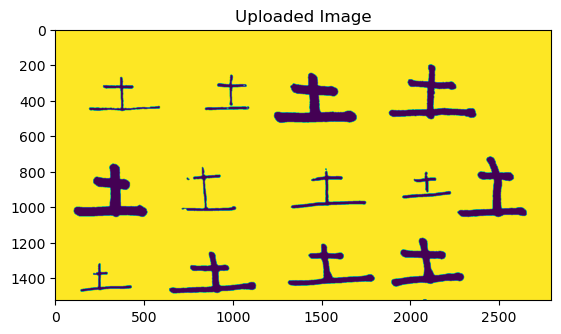

In [72]:
from PIL import Image
import matplotlib.pyplot as plt

# Load and display the provided image
img_path = "exampledata20.jpg"
img = Image.open(img_path)

# Display the image
plt.imshow(img)
plt.axis('on')  # Display axes for clarity
plt.title("Uploaded Image")
plt.show()


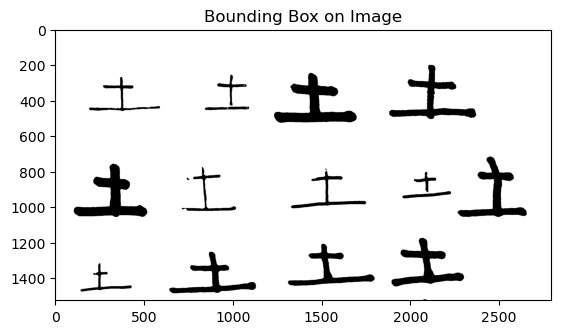

(1881, 200, 492, 307)

In [73]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Assuming 'img' is already defined and loaded
# Since the image is already in grayscale, we can proceed with thresholding
_, thresh = cv2.threshold(np.array(img), 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Find contours in the thresholded image
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Extract bounding boxes from the contours
bboxes = [cv2.boundingRect(cnt) for cnt in contours]

# Find the bounding box with the largest area (assuming it's the full Kanji character)
largest_bbox = max(bboxes, key=lambda bbox: bbox[2] * bbox[3])

# Draw the largest bounding box on the original image
img_with_bbox = np.array(img).copy()
x, y, w, h = largest_bbox
cv2.rectangle(img_with_bbox, (x, y), (x + w, y + h), (255, 0, 0), 2)

# Display the image with bounding box
plt.imshow(img_with_bbox, cmap='gray')
plt.axis('on')
plt.title("Bounding Box on Image")
plt.show()

largest_bbox


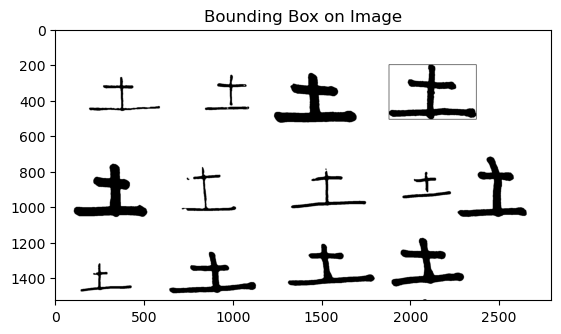

(1881, 200, 492, 307)


In [75]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def visualize_bounding_boxes(image_path):
    # Load the image using PIL
    img = Image.open(image_path)
    
    # Convert the image to binary using Otsu's thresholding
    _, thresh = cv2.threshold(np.array(img), 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Find contours in the thresholded image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Extract bounding boxes from the contours
    bboxes = [cv2.boundingRect(cnt) for cnt in contours]

    # Find the bounding box with the largest area (assuming it's the full Kanji character)
    largest_bbox = max(bboxes, key=lambda bbox: bbox[2] * bbox[3])

    # Draw the largest bounding box on the original image
    img_with_bbox = np.array(img).copy()
    x, y, w, h = largest_bbox
    cv2.rectangle(img_with_bbox, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Display the image with bounding box
    plt.imshow(img_with_bbox, cmap='gray')
    plt.axis('on')
    plt.title("Bounding Box on Image")
    plt.show()
    
    return largest_bbox

# Usage example:
image_path = 'exampledata20.jpg'
bounding_box = visualize_bounding_boxes(image_path)
print(bounding_box)


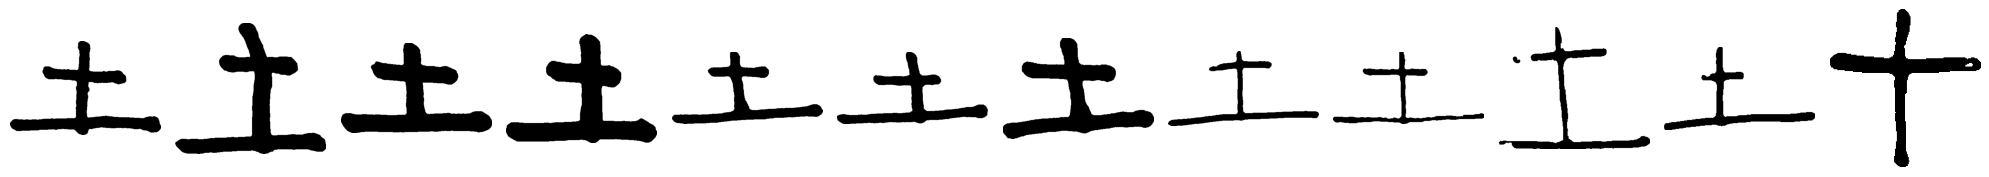

In [76]:
# Sort the bounding boxes based on their area (from largest to smallest)
sorted_bboxes = sorted(bboxes, key=lambda bbox: bbox[2] * bbox[3], reverse=True)

# Extract the top 'n' bounding boxes
num_kanji = 12  # Adjust this based on the number of Kanji characters you expect
selected_bboxes = sorted_bboxes[:num_kanji]

# Extract individual Kanji character images based on the selected bounding boxes
cropped_images = [img.crop((x, y, x + w, y + h)) for x, y, w, h in selected_bboxes]

# Display the extracted Kanji characters
fig, axes = plt.subplots(1, len(cropped_images), figsize=(20, 3))
for ax, cropped_img in zip(axes, cropped_images):
    ax.imshow(cropped_img, cmap='gray')
    ax.axis('off')

plt.tight_layout()
plt.show()


In [77]:
import pandas as pd

# Sort the bounding boxes based on their area (from largest to smallest)
sorted_bboxes = sorted(bboxes, key=lambda bbox: bbox[2] * bbox[3], reverse=True)

# Number of Kanji characters you expect to extract
num_kanji = 12

# Extract the top 'n' Kanji character images based on the selected bounding boxes
selected_bboxes = sorted_bboxes[:num_kanji]
cropped_images = [img.crop((x, y, x + w, y + h)) for x, y, w, h in selected_bboxes]

# Directory to save the cropped images
save_directory = "/Users/macbookpro/Downloads"
os.makedirs(save_directory, exist_ok=True)

# Check the existing files in the directory to ensure unique filenames
existing_files = os.listdir(save_directory)
existing_counts = [int(f.split('_')[1].split('.')[0]) for f in existing_files if "character_" in f]
start_idx = max(existing_counts, default=-1) + 1

# List to store new entries for the CSV
new_entries = []

# Save each cropped image to the directory and add their info to new_entries
for idx, cropped_img in enumerate(cropped_images, start=start_idx):
    filename = f"character_{idx}.jpg"
    cropped_img.save(f"{save_directory}/{filename}")
    
    # Append to new_entries
    new_entries.append({"Character Name": filename, "Label": "土", "English Translation": "Earth"})

# Load the existing CSV or create a new one if not present
if os.path.exists('newlabels.csv'):
    df = pd.read_csv('newlabels.csv')
else:
    df = pd.DataFrame(columns=["Character Name", "Label", "English Translation"])

# Append the new entries to the dataframe and save it back
df_new = pd.DataFrame(new_entries)
df = pd.concat([df, df_new], ignore_index=True)
df.to_csv('newlabels.csv', index=False)

In [78]:
df

,Character Name,Label,English Translation
0,character_1.jpg,火,fire
1,character_2.jpg,火,fire
2,character_3.jpg,火,fire
3,character_4.jpg,火,fire
4,character_5.jpg,火,fire
5,character_6.jpg,火,fire
6,character_7.jpg,火,fire
7,character_8.jpg,火,fire
8,character_108.jpg,火,Fire
9,character_109.jpg,火,Fire


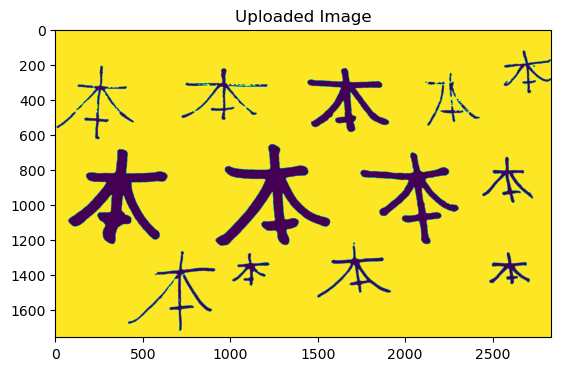

In [79]:
from PIL import Image
import matplotlib.pyplot as plt

# Load and display the provided image
img_path = "exampledata21.jpg"
img = Image.open(img_path)

# Display the image
plt.imshow(img)
plt.axis('on')  # Display axes for clarity
plt.title("Uploaded Image")
plt.show()


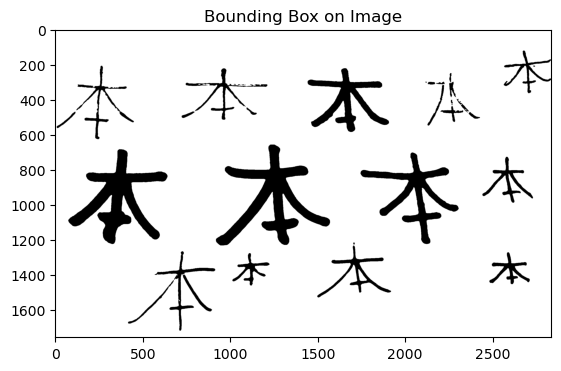

(918, 658, 655, 579)

In [80]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Assuming 'img' is already defined and loaded
# Since the image is already in grayscale, we can proceed with thresholding
_, thresh = cv2.threshold(np.array(img), 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Find contours in the thresholded image
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Extract bounding boxes from the contours
bboxes = [cv2.boundingRect(cnt) for cnt in contours]

# Find the bounding box with the largest area (assuming it's the full Kanji character)
largest_bbox = max(bboxes, key=lambda bbox: bbox[2] * bbox[3])

# Draw the largest bounding box on the original image
img_with_bbox = np.array(img).copy()
x, y, w, h = largest_bbox
cv2.rectangle(img_with_bbox, (x, y), (x + w, y + h), (255, 0, 0), 2)

# Display the image with bounding box
plt.imshow(img_with_bbox, cmap='gray')
plt.axis('on')
plt.title("Bounding Box on Image")
plt.show()

largest_bbox


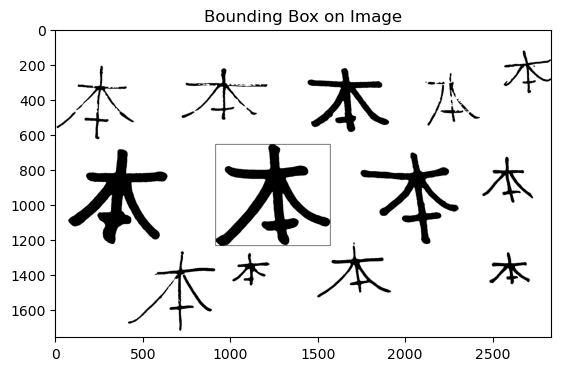

(918, 658, 655, 579)


In [83]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def visualize_bounding_boxes(image_path):
    # Load the image using PIL
    img = Image.open(image_path)
    
    # Convert the image to binary using Otsu's thresholding
    _, thresh = cv2.threshold(np.array(img), 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Find contours in the thresholded image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Extract bounding boxes from the contours
    bboxes = [cv2.boundingRect(cnt) for cnt in contours]

    # Find the bounding box with the largest area (assuming it's the full Kanji character)
    largest_bbox = max(bboxes, key=lambda bbox: bbox[2] * bbox[3])

    # Draw the largest bounding box on the original image
    img_with_bbox = np.array(img).copy()
    x, y, w, h = largest_bbox
    cv2.rectangle(img_with_bbox, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Display the image with bounding box
    plt.imshow(img_with_bbox, cmap='gray')
    plt.axis('on')
    plt.title("Bounding Box on Image")
    plt.show()
    
    return largest_bbox

# Usage example:
image_path = 'exampledata21.jpg'
bounding_box = visualize_bounding_boxes(image_path)
print(bounding_box)


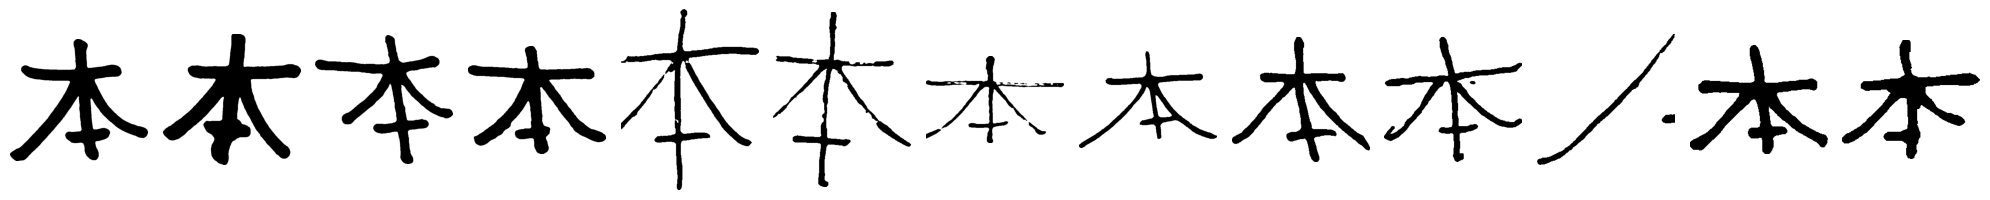

In [82]:
# Sort the bounding boxes based on their area (from largest to smallest)
sorted_bboxes = sorted(bboxes, key=lambda bbox: bbox[2] * bbox[3], reverse=True)

# Extract the top 'n' bounding boxes
num_kanji = 13  # Adjust this based on the number of Kanji characters you expect
selected_bboxes = sorted_bboxes[:num_kanji]

# Extract individual Kanji character images based on the selected bounding boxes
cropped_images = [img.crop((x, y, x + w, y + h)) for x, y, w, h in selected_bboxes]

# Display the extracted Kanji characters
fig, axes = plt.subplots(1, len(cropped_images), figsize=(20, 3))
for ax, cropped_img in zip(axes, cropped_images):
    ax.imshow(cropped_img, cmap='gray')
    ax.axis('off')

plt.tight_layout()
plt.show()


In [84]:
import pandas as pd

# Sort the bounding boxes based on their area (from largest to smallest)
sorted_bboxes = sorted(bboxes, key=lambda bbox: bbox[2] * bbox[3], reverse=True)

# Number of Kanji characters you expect to extract
num_kanji = 13

# Extract the top 'n' Kanji character images based on the selected bounding boxes
selected_bboxes = sorted_bboxes[:num_kanji]
cropped_images = [img.crop((x, y, x + w, y + h)) for x, y, w, h in selected_bboxes]

# Directory to save the cropped images
save_directory = "/Users/macbookpro/Downloads"
os.makedirs(save_directory, exist_ok=True)

# Check the existing files in the directory to ensure unique filenames
existing_files = os.listdir(save_directory)
existing_counts = [int(f.split('_')[1].split('.')[0]) for f in existing_files if "character_" in f]
start_idx = max(existing_counts, default=-1) + 1

# List to store new entries for the CSV
new_entries = []

# Save each cropped image to the directory and add their info to new_entries
for idx, cropped_img in enumerate(cropped_images, start=start_idx):
    filename = f"character_{idx}.jpg"
    cropped_img.save(f"{save_directory}/{filename}")
    
    # Append to new_entries
    new_entries.append({"Character Name": filename, "Label": "本", "English Translation": "Book"})

# Load the existing CSV or create a new one if not present
if os.path.exists('newlabels.csv'):
    df = pd.read_csv('newlabels.csv')
else:
    df = pd.DataFrame(columns=["Character Name", "Label", "English Translation"])

# Append the new entries to the dataframe and save it back
df_new = pd.DataFrame(new_entries)
df = pd.concat([df, df_new], ignore_index=True)
df.to_csv('newlabels.csv', index=False)

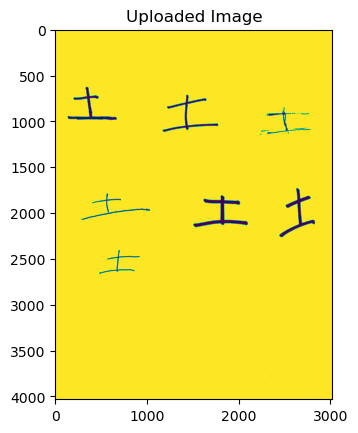

In [140]:
from PIL import Image
import matplotlib.pyplot as plt

# Load and display the provided image
img_path = "exampledata22.jpg"
img = Image.open(img_path)

# Display the image
plt.imshow(img)
plt.axis('on')  # Display axes for clarity
plt.title("Uploaded Image")
plt.show()


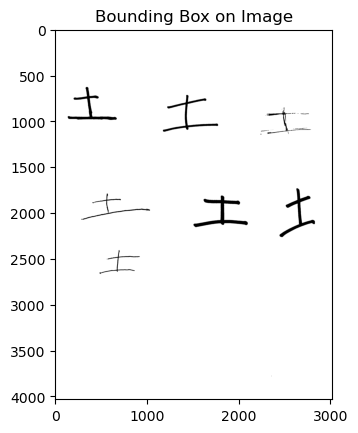

(1172, 717, 603, 403)

In [141]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Assuming 'img' is already defined and loaded
# Since the image is already in grayscale, we can proceed with thresholding
_, thresh = cv2.threshold(np.array(img), 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Find contours in the thresholded image
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Extract bounding boxes from the contours
bboxes = [cv2.boundingRect(cnt) for cnt in contours]

# Find the bounding box with the largest area (assuming it's the full Kanji character)
largest_bbox = max(bboxes, key=lambda bbox: bbox[2] * bbox[3])

# Draw the largest bounding box on the original image
img_with_bbox = np.array(img).copy()
x, y, w, h = largest_bbox
cv2.rectangle(img_with_bbox, (x, y), (x + w, y + h), (255, 0, 0), 2)

# Display the image with bounding box
plt.imshow(img_with_bbox, cmap='gray')
plt.axis('on')
plt.title("Bounding Box on Image")
plt.show()

largest_bbox


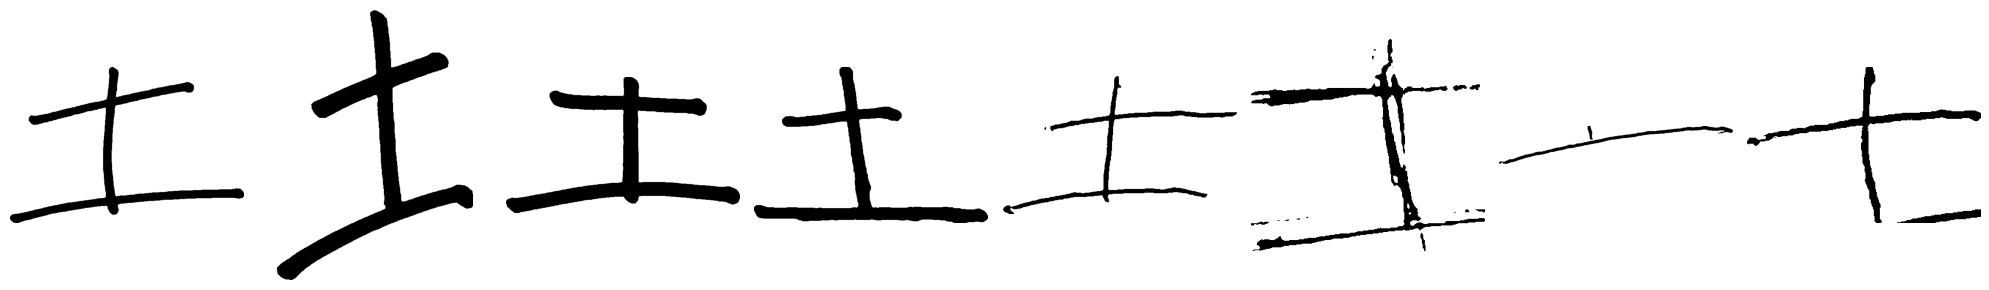

In [146]:
# Sort the bounding boxes based on their area (from largest to smallest)
sorted_bboxes = sorted(bboxes, key=lambda bbox: bbox[2] * bbox[3], reverse=True)

# Extract the top 'n' bounding boxes
num_kanji = 8  # Adjust this based on the number of Kanji characters you expect
selected_bboxes = sorted_bboxes[:num_kanji]

# Extract individual Kanji character images based on the selected bounding boxes
cropped_images = [img.crop((x, y, x + w, y + h)) for x, y, w, h in selected_bboxes]

# Display the extracted Kanji characters
fig, axes = plt.subplots(1, len(cropped_images), figsize=(20, 3))
for ax, cropped_img in zip(axes, cropped_images):
    ax.imshow(cropped_img, cmap='gray')
    ax.axis('off')

plt.tight_layout()
plt.show()


# Extracting Test data 1

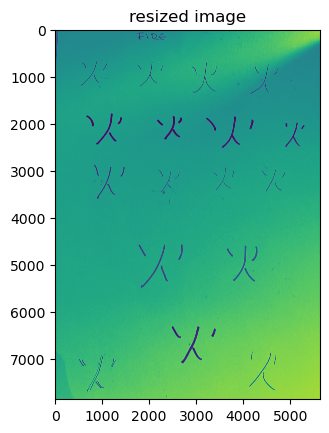

In [571]:
from PIL import Image
import matplotlib.pyplot as plt

# Load and display the provided image
img_path = "resized_image.jpg"
img = Image.open(img_path)

# Display the image
plt.imshow(img)
plt.axis('on')  # Display axes for clarity
plt.title("resized image")
plt.show()


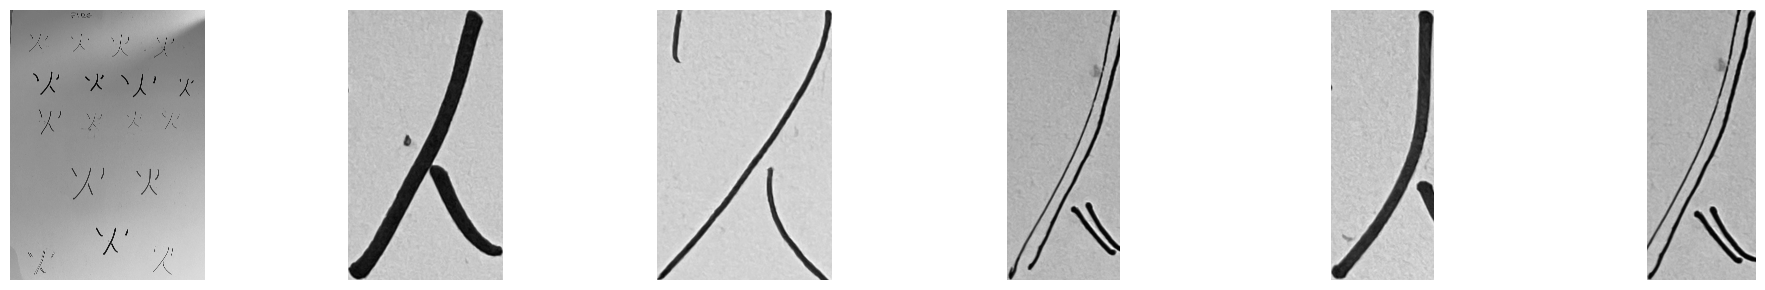

In [563]:
# Sort bounding boxes based on area
sorted_bboxes = sorted(bboxes, key=lambda bbox: bbox[2] * bbox[3], reverse=True)

# Set a threshold for the number of Kanji you expect to extract
num_kanji = 6

# Extract the bounding boxes with the largest areas up to the threshold
largest_bboxes = sorted_bboxes[:num_kanji]

cropped_images = []
for x, y, w, h in largest_bboxes:
    cropped = img.crop((x, y, x + w, y + h))
    cropped_images.append(cropped)

# Display the cropped images
fig, axes = plt.subplots(1, len(cropped_images), figsize=(20, 3))
for ax, cropped_img in zip(axes, cropped_images):
    ax.imshow(cropped_img, cmap='gray')
    ax.axis('off')

plt.tight_layout()
plt.show()


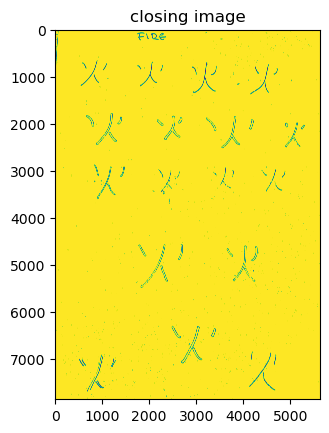

In [572]:
from PIL import Image
import matplotlib.pyplot as plt

# Load and display the provided image
img_path = "closing_image.jpg"
img = Image.open(img_path)

# Display the image
plt.imshow(img)
plt.axis('on')  # Display axes for clarity
plt.title("closing image")
plt.show()


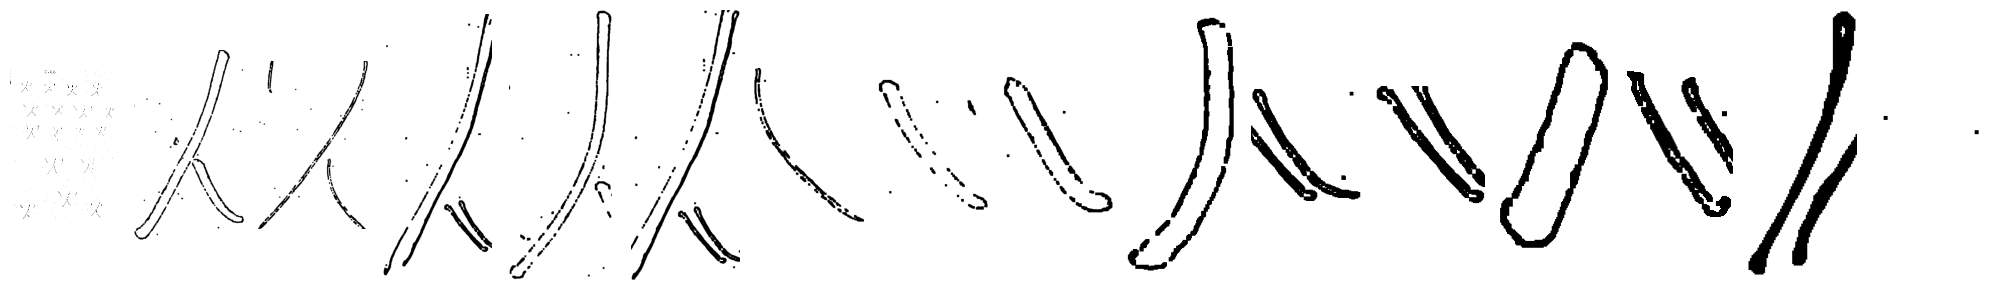

In [569]:
# Sort bounding boxes based on area
sorted_bboxes = sorted(bboxes, key=lambda bbox: bbox[2] * bbox[3], reverse=True)

# Set a threshold for the number of Kanji you expect to extract
num_kanji = 16

# Extract the bounding boxes with the largest areas up to the threshold
largest_bboxes = sorted_bboxes[:num_kanji]

cropped_images = []
for x, y, w, h in largest_bboxes:
    cropped = img.crop((x, y, x + w, y + h))
    cropped_images.append(cropped)

# Display the cropped images
fig, axes = plt.subplots(1, len(cropped_images), figsize=(20, 3))
for ax, cropped_img in zip(axes, cropped_images):
    ax.imshow(cropped_img, cmap='gray')
    ax.axis('off')

plt.tight_layout()
plt.show()


In [147]:
import pandas as pd

# Sort the bounding boxes based on their area (from largest to smallest)
sorted_bboxes = sorted(bboxes, key=lambda bbox: bbox[2] * bbox[3], reverse=True)

# Number of Kanji characters you expect to extract
num_kanji = 8

# Extract the top 'n' Kanji character images based on the selected bounding boxes
selected_bboxes = sorted_bboxes[:num_kanji]
cropped_images = [img.crop((x, y, x + w, y + h)) for x, y, w, h in selected_bboxes]

# Directory to save the cropped images
save_directory = "/Users/macbookpro/Downloads"
os.makedirs(save_directory, exist_ok=True)

# Check the existing files in the directory to ensure unique filenames
existing_files = os.listdir(save_directory)
existing_counts = [int(f.split('_')[1].split('.')[0]) for f in existing_files if "character_" in f]
start_idx = max(existing_counts, default=-1) + 1

# List to store new entries for the CSV
new_entries = []

# Save each cropped image to the directory and add their info to new_entries
for idx, cropped_img in enumerate(cropped_images, start=start_idx):
    filename = f"character_{idx}.jpg"
    cropped_img.save(f"{save_directory}/{filename}")
    
    # Append to new_entries
    new_entries.append({"Character Name": filename, "Label": "土", "English Translation": "Earth"})

# Load the existing CSV or create a new one if not present
if os.path.exists('newlabels.csv'):
    df = pd.read_csv('newlabels.csv')
else:
    df = pd.DataFrame(columns=["Character Name", "Label", "English Translation"])

# Append the new entries to the dataframe and save it back
df_new = pd.DataFrame(new_entries)
df = pd.concat([df, df_new], ignore_index=True)
df.to_csv('newlabels.csv', index=False)

In [550]:
df

,Character Name,Label,English Translation
0,character_1.jpg,火,Fire
1,character_2.jpg,火,Fire
2,character_3.jpg,火,Fire
3,character_4.jpg,火,Fire
4,character_5.jpg,火,Fire
5,character_6.jpg,火,Fire
6,character_7.jpg,火,Fire
7,character_8.jpg,火,Fire
8,character_108.jpg,火,Fire
9,character_109.jpg,火,Fire


In [172]:
# Assuming you have labels for the 8 unique Kanji characters
# For demonstration purposes, let's use placeholder labels.
# Replace these with the correct labels for your characters.


#kanji_labels = ["行", "新", "話", "愛", "女", "天", "定", "窓"]
#english_translations = ["Go", "New", "Talk", "Love", "Woman", "Heaven", "Determined", "Window"]

# Load the existing CSV or create a new one if not present
#if os.path.exists('newlabels.csv'):
#    df = pd.read_csv('newlabels.csv')
#else:
#    df = pd.DataFrame(columns=["Character Name", "Label", "English Translation"])

# Iterate over the saved files and assign labels
#for idx, file_path in enumerate(saved_files):
 #   char_name = os.path.basename(file_path)
 #   label = kanji_labels[idx % 8] # Since there are 8 unique characters
  #  translation = english_translations[idx % 8]
  #  new_entry = {"Character Name": char_name, "Label": label, "English Translation": translation}
  #  df.loc[len(df)] = new_entry

# Save the updated CSV
#df.to_csv('newlabels.csv', index=False)

In [581]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
# Set seeds for reproducibility
np.random.seed(220074391)
tf.random.set_seed(220074381)


# Path to the directory containing the images
data_directory = "/Users/macbookpro/Downloads"

# Initialize the data generators
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.15)  # Rescale and set aside 20% of data for validation

# Training data generator
train_generator = datagen.flow_from_dataframe(
    dataframe=pd.read_csv('/Users/macbookpro/Downloads/newlabels.csv'),
    directory=data_directory,
    x_col="Character Name",
    y_col="Label",
    target_size=(32, 32),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    subset="training"
)

# Validation data generator
validation_generator = datagen.flow_from_dataframe(
    dataframe=pd.read_csv('/Users/macbookpro/Downloads/newlabels.csv'),
    directory=data_directory,
    x_col="Character Name",
    y_col="Label",
    target_size=(32, 32),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    subset="validation"
)

Found 46 validated image filenames belonging to 3 classes.
Found 7 validated image filenames belonging to 3 classes.


In [582]:
import pandas as pd

# Load the CSV to determine the number of unique classes
df = pd.read_csv('/Users/macbookpro/Downloads/newlabels.csv')
num_classes = df['Label'].nunique()

def create_complex_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(0.3),
        
        tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(0.3),
        
        tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(0.3),
        
        tf.keras.layers.Flatten(),
        
        tf.keras.layers.Dense(1024, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),
        
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),
        
        tf.keras.layers.Dense(len(train_generator.class_indices), activation='softmax')  # Number of classes
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [583]:
model = create_enhanced_model()

In [584]:
history = model.fit(
    train_generator,
    epochs=100,  # Number of epochs
    validation_data=validation_generator
)

Epoch 1/100
2/2 [==============================] - 0s 136ms/step - loss: 1.1147 - accuracy: 0.3261 - val_loss: 1.2720 - val_accuracy: 0.0000e+00
Epoch 2/100
2/2 [==============================] - 0s 32ms/step - loss: 1.0727 - accuracy: 0.3913 - val_loss: 1.5071 - val_accuracy: 0.0000e+00
Epoch 3/100
2/2 [==============================] - 0s 31ms/step - loss: 1.1141 - accuracy: 0.4348 - val_loss: 1.4998 - val_accuracy: 0.0000e+00
Epoch 4/100
2/2 [==============================] - 0s 25ms/step - loss: 1.0418 - accuracy: 0.4348 - val_loss: 1.1429 - val_accuracy: 0.0000e+00
Epoch 5/100
2/2 [==============================] - 0s 34ms/step - loss: 0.9783 - accuracy: 0.5870 - val_loss: 1.0173 - val_accuracy: 1.0000
Epoch 6/100
2/2 [==============================] - 0s 24ms/step - loss: 1.0922 - accuracy: 0.2826 - val_loss: 1.0486 - val_accuracy: 1.0000
Epoch 7/100
2/2 [==============================] - 0s 36ms/step - loss: 1.0265 - accuracy: 0.3913 - val_loss: 1.2044 - val_accuracy: 0.0000e+00

In [585]:
final_val_accuracy = history.history['val_accuracy'][-1]
print(f"Final validation accuracy: {final_val_accuracy * 100:.2f}%")


Final validation accuracy: 85.71%


In [502]:
from tensorflow.keras.preprocessing import image
import numpy as np

def preprocess_image(img_path, target_size=(32, 32)):
    """Preprocess the image for prediction."""
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize to [0,1]
    return np.expand_dims(img_array, axis=0)

# Preprocess the provided images
resized_image = preprocess_image(resized_image_path)
closing_image = preprocess_image(closing_image_path)

# Make predictions
resized_prediction = model.predict(resized_image)
closing_prediction = model.predict(closing_image)

# Decode predictions to get class labels
resized_label = np.argmax(resized_prediction, axis=1)[0]
closing_label = np.argmax(closing_prediction, axis=1)[0]

# Get the class labels from the train generator
class_labels = list(train_generator.class_indices.keys())

print(f"Prediction for resized_image: {class_labels[resized_label]}")
print(f"Prediction for closing_image: {class_labels[closing_label]}")


1/1 [==============================] - 0s 8ms/step
Prediction for resized_image: 火
Prediction for closing_image: 火


In [549]:
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd

def preprocess_image(img_path, target_size=(32, 32)):
    """Preprocess the image for prediction."""
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize to [0,1]
    return np.expand_dims(img_array, axis=0)

# Load the CSV to get the mapping between labels and English translations
df = pd.read_csv('/Users/macbookpro/Downloads/newlabels.csv')
label_to_translation = dict(zip(df['Label'], df['English Translation']))

# Preprocess the provided images
resized_image = preprocess_image(resized_image_path)
closing_image = preprocess_image(closing_image_path)

# Make predictions
resized_prediction = model.predict(resized_image)
closing_prediction = model.predict(closing_image)

# Decode predictions to get class labels
resized_label_index = np.argmax(resized_prediction, axis=1)[0]
closing_label_index = np.argmax(closing_prediction, axis=1)[0]

# Get the class labels from the train generator
class_labels = list(train_generator.class_indices.keys())

# Fetch the predicted label and its corresponding English translation
resized_predicted_label = class_labels[resized_label_index]
closing_predicted_label = class_labels[closing_label_index]

resized_predicted_translation = label_to_translation[resized_predicted_label]
closing_predicted_translation = label_to_translation[closing_predicted_label]

print(f"Prediction for resized_image: {resized_predicted_label} (English: {resized_predicted_translation})")
print(f"Prediction for closing_image: {closing_predicted_label} (English: {closing_predicted_translation})")


1/1 [==============================] - 0s 10ms/step
Prediction for resized_image: 火 (English: Fire)
Prediction for closing_image: 火 (English: Fire)


In [503]:
# Given true labels and predicted labels
true_labels = ["火", "火"]
predicted_labels = [class_labels[resized_label], class_labels[closing_label]]

correct_predictions = sum([true == pred for true, pred in zip(true_labels, predicted_labels)])
accuracy = correct_predictions / len(true_labels) * 100

print(f"Accuracy: {accuracy:.2f}%")


Accuracy: 100.00%


In [505]:
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd

# Load the CSV to get the mapping between labels and English translations
df = pd.read_csv('newlabels.csv')
label_to_translation = dict(zip(df['Label'], df['English Translation']))

# Path to the image
img_path = '063.gif'

# Load and preprocess the image
img = image.load_img(img_path, target_size=(32, 32))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

# Predict the class
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)[0]

# Fetch the predicted label and its corresponding English translation
predicted_label = class_labels[predicted_class]
predicted_translation = label_to_translation[predicted_label]

print(f"Prediction for 063.gif: {predicted_label} (English: {predicted_translation})")


1/1 [==============================] - 0s 11ms/step
Prediction for 063.gif: 土 (English: Earth)


In [508]:
# Instantiate the model
model_instance = create_complex_model()

# Save the model
model_instance.save('complex_model.h5')


/Users/macbookpro/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.


# Bayesian Optimization on model

In [553]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
import pandas as pd

# Set seeds for reproducibility
np.random.seed(220074391)
tf.random.set_seed(220074381)

data_directory = "/Users/macbookpro/Downloads"
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.15)

train_generator = datagen.flow_from_dataframe(
    dataframe=pd.read_csv('/Users/macbookpro/Downloads/newlabels.csv'),
    directory=data_directory,
    x_col="Character Name",
    y_col="Label",
    target_size=(32, 32),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    subset="training"
)

validation_generator = datagen.flow_from_dataframe(
    dataframe=pd.read_csv('/Users/macbookpro/Downloads/newlabels.csv'),
    directory=data_directory,
    x_col="Character Name",
    y_col="Label",
    target_size=(32, 32),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    subset="validation"
)

def create_complex_model(lr=1e-3, dropout_rate=0.3, num_filters=[64, 128, 256]):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(num_filters[0], (3,3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(num_filters[0], (3,3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(dropout_rate),
        
        tf.keras.layers.Conv2D(num_filters[1], (3,3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(num_filters[1], (3,3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(dropout_rate),
        
        tf.keras.layers.Conv2D(num_filters[2], (3,3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(num_filters[2], (3,3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(dropout_rate),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1024, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),
        
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),
        
        tf.keras.layers.Dense(len(train_generator.class_indices), activation='softmax')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint("best_model.h5", monitor='val_loss', save_best_only=True)

model = create_complex_model()
history = model.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator,
    callbacks=[early_stopping, model_checkpoint]
)


Found 46 validated image filenames belonging to 3 classes.
Found 7 validated image filenames belonging to 3 classes.


Epoch 1/100
2/2 [==============================] - 1s 423ms/step - loss: 1.6610 - accuracy: 0.4130 - val_loss: 1.1012 - val_accuracy: 0.0000e+00
Epoch 2/100
1/2 [==============>...............] - ETA: 0s - loss: 1.1736 - accuracy: 0.5714

/Users/macbookpro/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  for trackable_obj in self._self_tracked_trackables:


2/2 [==============================] - 0s 179ms/step - loss: 0.9901 - accuracy: 0.6087 - val_loss: 1.1024 - val_accuracy: 0.0000e+00
Epoch 3/100
2/2 [==============================] - 0s 242ms/step - loss: 0.4682 - accuracy: 0.8261 - val_loss: 1.0848 - val_accuracy: 0.0000e+00
Epoch 4/100
2/2 [==============================] - 0s 193ms/step - loss: 0.3952 - accuracy: 0.8478 - val_loss: 1.1057 - val_accuracy: 0.0000e+00
Epoch 5/100
2/2 [==============================] - 0s 180ms/step - loss: 0.1766 - accuracy: 0.9565 - val_loss: 1.1245 - val_accuracy: 0.0000e+00
Epoch 6/100
2/2 [==============================] - 0s 176ms/step - loss: 0.2900 - accuracy: 0.8913 - val_loss: 1.2241 - val_accuracy: 0.0000e+00
Epoch 7/100
2/2 [==============================] - 0s 102ms/step - loss: 0.0314 - accuracy: 1.0000 - val_loss: 1.3253 - val_accuracy: 0.0000e+00
Epoch 8/100
2/2 [==============================] - 0s 167ms/step - loss: 0.0633 - accuracy: 0.9783 - val_loss: 1.4838 - val_accuracy: 0.0000e+

In [515]:
# Replace 'fire' with 'Fire' in the entire DataFrame
df.replace('fire', 'Fire', inplace=True)

# If you specifically want to replace only in a certain column, say 'English', you can do:
# df['English'].replace('fire', 'Fire', inplace=True)

# Save the updated DataFrame back to the CSV if needed
df.to_csv('/Users/macbookpro/Downloads/newlabels.csv', index=False)


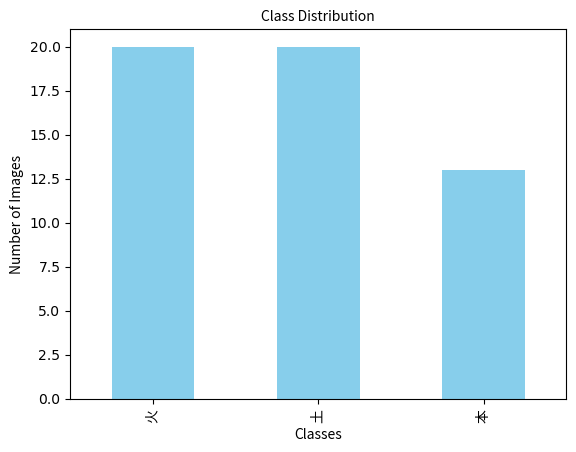

In [518]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# Load the CSV
df = pd.read_csv('/Users/macbookpro/Downloads/newlabels.csv')

# Class distribution
class_counts = df['Label'].value_counts()

# Define font properties using the provided font path
font_path = '/Users/macbookpro/Downloads/NotoSansJP-Regular.ttf'
font_properties = FontProperties(fname=font_path)

# Plot
ax = class_counts.plot(kind='bar', color='skyblue')
plt.title('Class Distribution', fontproperties=font_properties)
plt.xlabel('Classes', fontproperties=font_properties)
plt.ylabel('Number of Images', fontproperties=font_properties)

# Set tick labels with the font properties
ax.set_xticklabels(class_counts.index, fontproperties=font_properties)
plt.show()


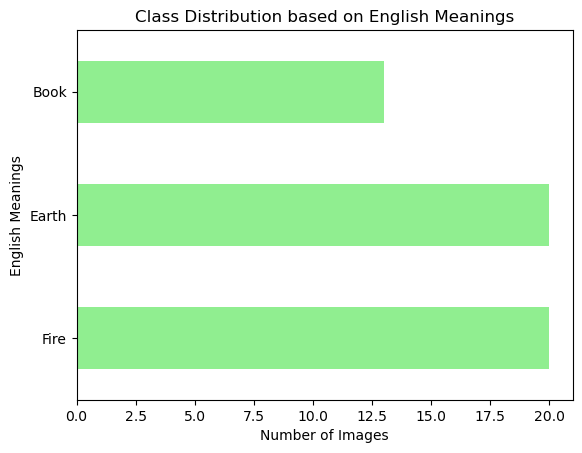

In [542]:
# Class distribution based on English meanings
english_counts = df['English Translation'].value_counts()

# Plot
english_counts.plot(kind='barh', color='lightgreen')
plt.title('Class Distribution based on English Meanings')
plt.xlabel('Number of Images')
plt.ylabel('English Meanings')
plt.show()


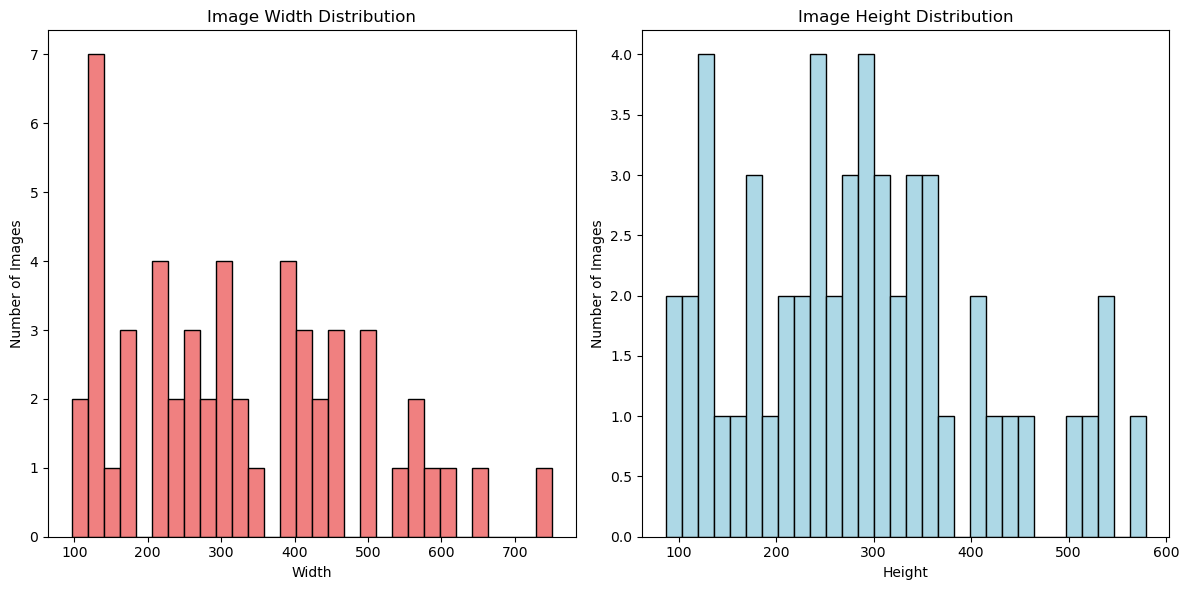

In [513]:
from PIL import Image

# Extract image sizes
image_sizes = []

for img_name in df['Character Name']:
    img_path = os.path.join(data_directory, img_name)
    with Image.open(img_path) as img:
        width, height = img.size
        image_sizes.append((width, height))

# Convert to DataFrame for easier plotting
sizes_df = pd.DataFrame(image_sizes, columns=['Width', 'Height'])

# Plot
plt.figure(figsize=(12, 6))

# Width distribution
plt.subplot(1, 2, 1)
plt.hist(sizes_df['Width'], bins=30, color='lightcoral', edgecolor='black')
plt.title('Image Width Distribution')
plt.xlabel('Width')
plt.ylabel('Number of Images')

# Height distribution
plt.subplot(1, 2, 2)
plt.hist(sizes_df['Height'], bins=30, color='lightblue', edgecolor='black')
plt.title('Image Height Distribution')
plt.xlabel('Height')
plt.ylabel('Number of Images')

plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 34ms/step


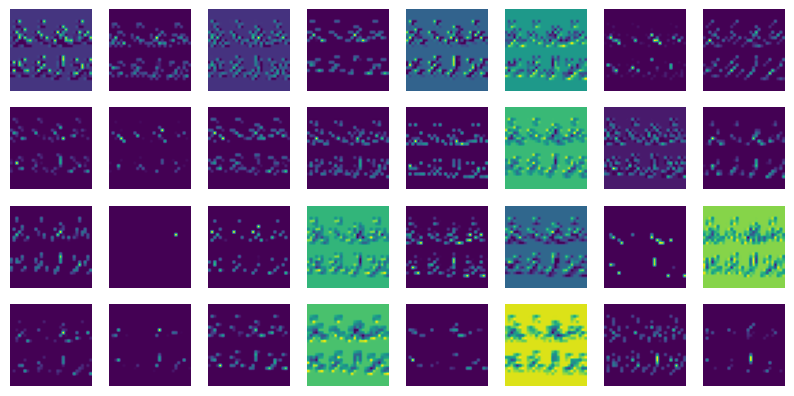

In [547]:
import numpy as np
import matplotlib.pyplot as plt

# Load an image (you can replace this with any image from your dataset)
img = image.load_img("exampledata7.jpg", target_size=(32, 32))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.  # Model input should be normalized to [0,1]

# Extract model layer outputs
layer_outputs = [layer.output for layer in model.layers if "conv" in layer.name]  # Assuming "conv" in the name of convolutional layers

# Create a model for feature map extraction
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

# Get feature maps
activations = activation_model.predict(img_tensor)

# Visualize the feature maps of the first convolutional layer
first_layer_activation = activations[0]
plt.figure(figsize=(10, 10))
for i in range(first_layer_activation.shape[-1]):
    plt.subplot(8, 8, i + 1)  # Assuming 64 filters, adjust if different
    plt.imshow(first_layer_activation[0, :, :, i], cmap='viridis')
    plt.axis('off')
plt.show()
